In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pandas import Series, DataFrame, Panel
import plotnine
from pandas import Timestamp
from ggplot import*
from plotnine import *
from plotly.tools import mpl_to_plotly as ggplotly

<ipython-input-1-767e47e7e0ca>:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Series, DataFrame, Panel


In [2]:
# single exponential smoothing
# from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# prepare data
meat = pd.read_csv("D:/Documents/Data/meat_min.csv")
meat_df = pd.DataFrame(meat)
meat_df.head(6)

,date,Cattle,Hogs,Sheep,Poultry
0,Jan-1969,2835.67,5148.1,1055.0,628.30
1,Feb-1969,2495.45,5535.0,807.9,505.85
2,Mar-1969,2663.16,6346.6,866.7,547.93
3,Apr-1969,2648.41,6260.8,900.5,599.46
4,May-1969,2648.91,6340.0,891.3,650.01
5,Jun-1969,2660.32,5822.4,865.2,703.30


In [3]:
cattle = meat[['date','Cattle']]
cattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    84 non-null     object 
 1   Cattle  84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [4]:
cattle_ts = pd.DataFrame(cattle, columns=['date','Cattle']).set_index('date')
cattle_ts.head(8)

,Cattle
date,
Jan-1969,2835.67
Feb-1969,2495.45
Mar-1969,2663.16
Apr-1969,2648.41
May-1969,2648.91
Jun-1969,2660.32
Jul-1969,2815.80
Aug-1969,2819.31


In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cattle_ts, test_size=0.10, shuffle=False)
model = SimpleExpSmoothing(np.asarray(train['Cattle']))
#model._index = pd.to_datetime(train.index)

In [6]:
fit1 = model.fit(smoothing_level=.3)
pred1 = fit1.forecast(9)
fit1.summary()

Dep. Variable:,endog,No. Observations:,75
Model:,SimpleExpSmoothing,SSE,2014556.630
Optimized:,True,AIC,768.882
Trend:,None,BIC,773.517
Seasonal:,None,AICC,769.453
Seasonal Periods:,None,Date:,"Fri, 13 Nov 2020"
Box-Cox:,False,Time:,13:08:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3000000,alpha,False
initial_level,2699.4714,l.0,True


In [7]:
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(9)
fit2.summary()

D:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Dep. Variable:,endog,No. Observations:,75
Model:,SimpleExpSmoothing,SSE,2020457.626
Optimized:,True,AIC,769.101
Trend:,None,BIC,773.736
Seasonal:,None,AICC,769.672
Seasonal Periods:,None,Date:,"Fri, 13 Nov 2020"
Box-Cox:,False,Time:,13:08:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
initial_level,2717.3104,l.0,True


In [8]:
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(9)
fit3.summary()

Dep. Variable:,endog,No. Observations:,75
Model:,SimpleExpSmoothing,SSE,2169575.278
Optimized:,True,AIC,774.442
Trend:,None,BIC,779.077
Seasonal:,None,AICC,775.013
Seasonal Periods:,None,Date:,"Fri, 13 Nov 2020"
Box-Cox:,False,Time:,13:08:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,2708.9537,l.0,True


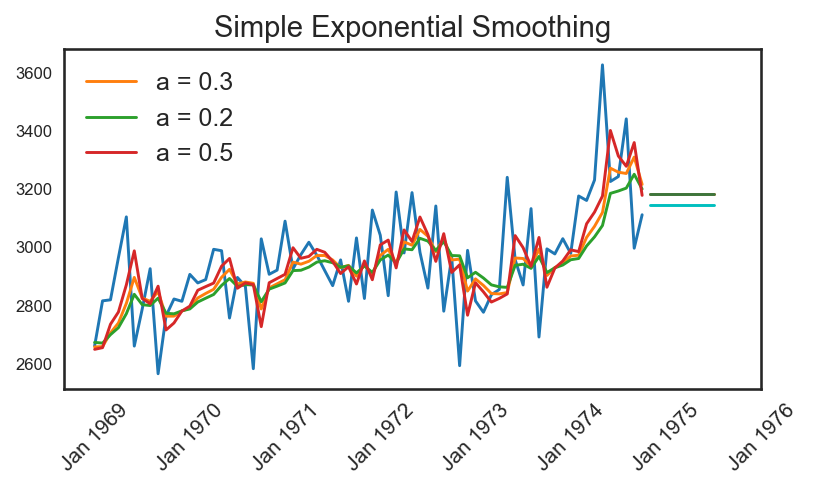

In [21]:
plt.style.use('seaborn-paper')
matplotlib.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(train.index[5:], train.values[5:])
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[5:], f.fittedvalues[5:], label="a = " + str(f.params['smoothing_level'])[:3])
    ax.plot(test.index[-11:], p, color=c, )
plt.xticks(rotation=45, fontsize = 10)
plt.xticks([0, 12, 24, 36, 48, 60, 72, 84],
           ["Jan 1969", "Jan 1970", "Jan 1971", "Jan 1972", "Jan 1973", "Jan 1974", "Jan 1975", "Jan 1976"])
plt.title("Simple Exponential Smoothing", fontsize = 14)  
plt.legend(loc=2, fontsize=12)
plt.savefig('02_ses_ts.png', figsize = (6,3), dpi = 150, bbox_inches = 'tight')
plt.show()

# f.params['smoothing_level']

In [24]:
model = Holt(np.asarray(train['Cattle']))
#model._index = pd.to_datetime(train.index)

In [25]:
fit4 = model.fit(smoothing_level=.3, smoothing_slope=0.1)
pred4 = fit4.forecast(9)
fit5 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred5 = fit5.forecast(9)
fit6 = model.fit(smoothing_level=.5, smoothing_slope=.5)
pred6 = fit6.forecast(9)

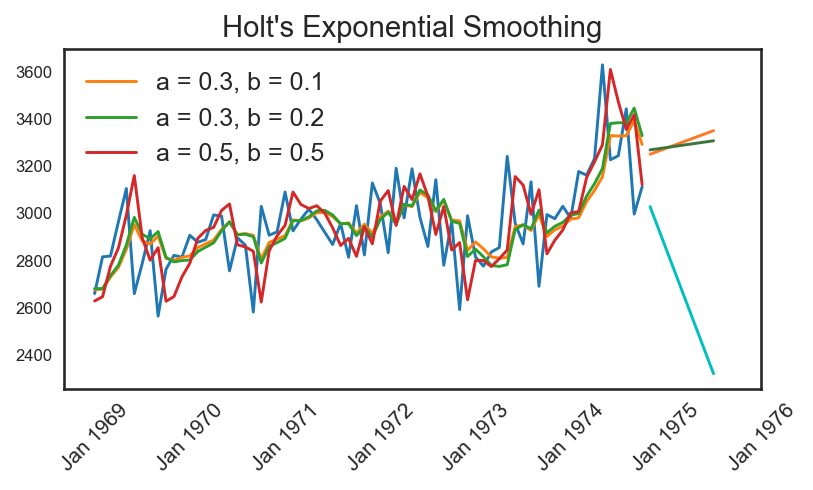

In [26]:
plt.style.use('seaborn-white')
matplotlib.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(train.index[5:], train.values[5:])
for p, f, c in zip((pred4, pred5, pred6),(fit4, fit5, fit6),('#ff7823','#3c763d','c')):
    ax.plot(train.index[5:], f.fittedvalues[5:], label="a = " + str(f.params['smoothing_level'])[:3] + ", b = "+str(f.params[('smoothing_slope')])[:3])
    ax.plot(test.index[-11:], p, color=c, )
plt.xticks(rotation=45, fontsize = 10)
plt.xticks([0, 12, 24, 36, 48, 60, 72, 84],
           ["Jan 1969", "Jan 1970", "Jan 1971", "Jan 1972", "Jan 1973", "Jan 1974", "Jan 1975", "Jan 1976"])
plt.title("Holt's Exponential Smoothing", fontsize = 14)  
plt.legend(loc=2, fontsize=12)
plt.savefig('02_holt_ts.png', figsize = (6,3), dpi = 150, bbox_inches = 'tight')
plt.show()

In [27]:
by_decade = meat_ts.groupby(floor_decade).sum()
print(by_decade)

NameError: name 'meat_ts' is not defined

In [11]:
meat= pd.read_csv("D:/Documents/Data/meat2.csv")
meat_ts=meat[['date','cattle','hogs','sheep','poultry']]
meat_ts.head(10)

,date,cattle,hogs,sheep,poultry
0,1948-01-01,51.3,144.6,1464.0,10.4
1,1948-02-01,37.7,665.6,1306.7,87.6
2,1948-03-01,35.7,1242.0,1297.2,79.6
3,1948-04-01,45.1,377.5,1178.1,14.7
4,1948-05-01,52.9,833.5,1095.3,67.2
5,1948-06-01,81.0,1377.2,1405.0,84.9
6,1948-07-01,75.4,1398.8,1333.1,16.3
7,1948-08-01,83.6,857.7,1406.2,31.2
8,1948-09-01,68.9,1025.4,1615.7,83.3
9,1948-10-01,54.1,1653.6,1768.7,15.7


In [51]:
by_decade

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
1940,55751.0,8566.0,55737.0,5071.0,0.0,0.0,0.0
1950,119161.0,12693.0,98450.0,6724.0,0.0,0.0,0.0
1960,177754.0,8577.0,116587.0,6873.0,50861.7,0.0,13079.7
1970,228947.0,5713.0,132539.0,4256.0,84948.1,0.0,18352.5
1980,230100.0,4278.0,150528.0,3394.0,137403.8,0.0,30185.4
1990,243579.0,2938.0,173519.0,2986.0,241590.3,0.0,50531.1
2000,260540.7,1685.3,208211.3,1964.7,339935.6,4648.4,56828.2
2010,76391.5,371.9,66491.2,455.6,108290.4,1505.4,16960.4


In [55]:
by_decade = meat_ts.groupby(floor_decade).sum()
by_decade.index.name = 'year'
by_decade = by_decade.reset_index()
by_decade

,year,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1940,55751.0,8566.0,55737.0,5071.0,0.0,0.0,0.0
1,1950,119161.0,12693.0,98450.0,6724.0,0.0,0.0,0.0
2,1960,177754.0,8577.0,116587.0,6873.0,50861.7,0.0,13079.7
3,1970,228947.0,5713.0,132539.0,4256.0,84948.1,0.0,18352.5
4,1980,230100.0,4278.0,150528.0,3394.0,137403.8,0.0,30185.4
5,1990,243579.0,2938.0,173519.0,2986.0,241590.3,0.0,50531.1
6,2000,260540.7,1685.3,208211.3,1964.7,339935.6,4648.4,56828.2
7,2010,76391.5,371.9,66491.2,455.6,108290.4,1505.4,16960.4


In [60]:
x = 'year'
y = 'beef'
ggplot(by_decade, aes(x,y)) + \
    geom_bar(fill = 'blue', color = 'steelblue', width = 50) + \
    scale_y_continuous(labels = 'comma') + \
    ggtitle('Head of Cattle Slaughtered by Decade') 

TypeError: 'module' object is not callable

In [59]:
ggplot(by_decade, aes(x='year', y='beef'))

TypeError: 'module' object is not callable